Acceptance Ratio:  0.96076


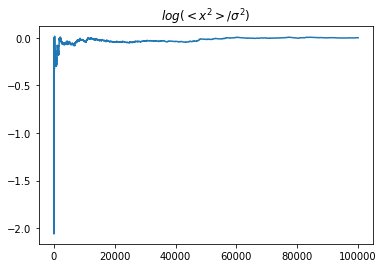

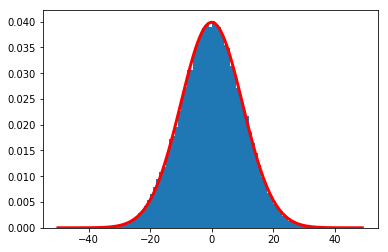

In [9]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

N = 100000

x = np.zeros(N)
dev = np.zeros(N)
delta = 2.
sigma = 10.
sigma2 = sigma**2
Nin = 0

def metropolis(xold):
    flag = 0
    xtrial = np.random.random()    
    xtrial = xold+(2*xtrial-1)*delta
    weight = np.exp(-0.5*(xtrial**2-xold**2)/sigma2)
    xnew = xold
    if(weight >= 1): #Accept
        xnew = xtrial
        flag = 1
    else:
        r = np.random.random()
        if(r <= weight): #Accept
            xnew = xtrial
            flag = 1
    return xnew,flag


# Only here to get a better starting point
xwalker = 20.
Nwarmup = 500000
for i in range(Nwarmup):
    xnew,_ = metropolis(xwalker)
    xwalker = xnew
#

x[0] = xwalker
s = x[0]**2
equitime = []

for i in range(1,N):
    x0 = x[i-1]

    for j in range(10):
        xnew,_ = metropolis(x0)
        x0 = xnew
    xnew,flag = metropolis(x0)
    x[i] = xnew
    
# flag=1 indicates 'Accept'    
    if(flag): Nin += 1         

# Calculate mean of squre
    s += x[i]**2
    meanofsq = s/(i+1)
    dev[i] = np.log(meanofsq/sigma2)
    #print(dev[i])
    if (dev[i]<0.01)&(dev[i]>0):
        equitime.append(i+1)

#print(equitime)
diff = np.diff(equitime)
diff2 = np.diff(diff)
#print(diff2)

plt.figure()
plt.plot(range(N),dev)
plt.title('$log(<x^2>/\sigma^2)$')


print("Acceptance Ratio: ",Nin/float(N))

plt.figure()
binwidth=sigma/10
plt.hist(x,bins=np.arange(-50,50., binwidth),density=True);

norm = 1./(sigma*np.sqrt(2*np.pi))
plt.plot(np.arange(-50.,50.,binwidth),norm*np.exp(-0.5*np.arange(-50.,50.,binwidth)**2/sigma2),ls='-',c='red',lw=3);

plt.show()

Acceptance ratio: 0.9981
Acceptance ratio: 0.99589
Acceptance ratio: 0.99044
Acceptance ratio: 0.97958
Acceptance ratio: 0.96131
Acceptance ratio: 0.90073
Acceptance ratio: 0.80688
Acceptance ratio: 0.62941


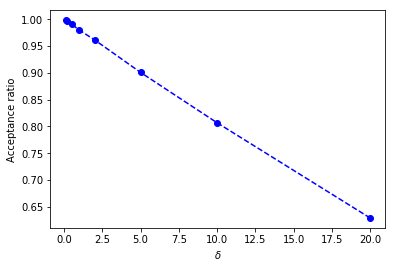

In [60]:
delta_list = [0.1,0.2,0.5,1,2,5,10,20]
accept_ratio = []

for delta in delta_list:
    N = 100000

    x = np.zeros(N)
    dev = np.zeros(N)

    sigma = 10.
    sigma2 = sigma**2
    Nin = 0
    
    xwalker = 20.
    Nwarmup = 500000
    for i in range(Nwarmup):
        xnew,_ = metropolis(xwalker)
        xwalker = xnew

    x[0] = xwalker
    s = x[0]**2
    equitime = []

    for i in range(1,N):
        x0 = x[i-1]

        for j in range(10):
            xnew,_ = metropolis(x0)
            x0 = xnew
        xnew,flag = metropolis(x0)
        x[i] = xnew
    
    # flag=1 indicates 'Accept'    
        if(flag): Nin += 1         

    # Calculate mean of squre
        s += x[i]**2
        meanofsq = s/(i+1)
        dev[i] = np.abs(meanofsq-sigma2)
        if dev[i]<0.001:
            equitime.append(i+1)

    ratio = Nin/float(N)
    accept_ratio.append(ratio)
    
    print('Acceptance ratio:', ratio)
    
plt.figure()
plt.plot(delta_list,accept_ratio,'bo--')
plt.xlabel('$\delta$')
plt.ylabel('Acceptance ratio')
plt.show()